# Animated CRMs central US from E3SM-MMF

Let's see what kind of cool plots I can make here ...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import glob
import cartopy.crs as ccrs   # map plots
import nc_time_axis
import cftime
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable  # to make reasonable colorbars
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition
import numpy as np

In [66]:
%env HOME

'/global/homes/c/crjones'

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
from e3sm_utils import cmclimate

In [4]:
cmap_prect = cmclimate.cm.WhiteBlueGreenYellowRed

In [5]:
conus = [230, 295, 20, 55]

In [6]:
flist = glob.glob('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/*.nc')
crm_flist = glob.glob('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_crm_hist/*.nc')

In [25]:
crm_ds.sel(time='0001-01-01').time

<xarray.DataArray 'time' (time: 24)>
array([cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 1, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 2, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 3, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 4, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 5, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 6, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 7, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 8, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 9, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 10, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 11, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 12, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 13, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 14, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 15, 0, 0, 0, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 16, 0, 

In [7]:
crm_ds = xr.open_mfdataset(crm_flist)

In [8]:
dates = set([t.strftime('%Y-%m-%d').replace(' ', '0') for t in crm_ds.time.values])

In [9]:
yr, mo, dy = zip(*[d.split('-') for d in dates])

In [10]:
def match_date_subset(dates, year=None, month=None, days=None):
    """ Extract a subset of dates from the original list of dates
    """
    if year is None and month is None and days is None:
        return dates
    
    def sel(val, groups):
        return groups is None or val in groups
    
    return sorted(['-'.join([yr, mo, dy]) for yr, mo, dy in [d.split('-') for d in dates] if 
                   all([sel(yr, year), sel(mo, month), sel(dy, days)])])

In [11]:
crm_ds

<xarray.Dataset>
Dimensions:                                   (crm_nx: 64, crm_nx_rad: 4, crm_ny: 1, crm_ny_rad: 1, crm_nz: 58, ilev: 73, lev: 72, nbnd: 2, ncol_97.8w_to_97.2w_36.27n_to_36.75n: 9, time: 9559)
Coordinates:
  * lev                                       (lev) float64 0.1238 ... 998.5
  * ilev                                      (ilev) float64 0.1 ... 1e+03
  * time                                      (time) object 0001-12-31 00:00:00 ... 0002-05-19 23:00:00
Dimensions without coordinates: crm_nx, crm_nx_rad, crm_ny, crm_ny_rad, crm_nz, nbnd, ncol_97.8w_to_97.2w_36.27n_to_36.75n
Data variables:
    lat_97.8w_to_97.2w_36.27n_to_36.75n       (time, ncol_97.8w_to_97.2w_36.27n_to_36.75n) float64 dask.array<shape=(9559, 9), chunksize=(120, 9)>
    lon_97.8w_to_97.2w_36.27n_to_36.75n       (time, ncol_97.8w_to_97.2w_36.27n_to_36.75n) float64 dask.array<shape=(9559, 9), chunksize=(120, 9)>
    hyam                                      (time, lev) float64 dask.array<shape=(9559

In [12]:
iterables = [(date, crm_ds.sel(time=date)) for date in match_date_subset(dates, year=None, month='05')]

In [13]:
iterables[3][1].time

<xarray.DataArray 'time' (time: 24)>
array([cftime.DatetimeNoLeap(2, 5, 4, 0, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 1, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 2, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 3, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 4, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 5, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 6, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 7, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 8, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 9, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 10, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 11, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 12, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 13, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 14, 0, 0, 0, 6, 124),
       cftime.DatetimeNoLeap(2, 5, 4, 15, 0, 0, 0, 6, 124),
       cftime

In [14]:
crm_ds.sel(time='0002-05-01').time

<xarray.DataArray 'time' (time: 24)>
array([cftime.DatetimeNoLeap(2, 5, 1, 0, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 1, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 2, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 3, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 4, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 5, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 6, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 7, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 8, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 9, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 10, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 11, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 12, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 13, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 14, 0, 0, 0, 3, 121),
       cftime.DatetimeNoLeap(2, 5, 1, 15, 0, 0, 0, 3, 121),
       cftime

In [15]:
ds = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190329.cam.h1.0002-05-15-00000.nc')

In [16]:
crm_ds = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_crm_hist/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190329.cam.h3.0002-05-15-00000.nc')

In [17]:
def rename_crm_vars(ds, squeeze=True):
    # get the suffix
    suf = [d for d in ds.dims if 'ncol' in d][0][4:]
    # strip suffix off any dimension/variable that contains it
    ds2 = ds.rename({v: v.replace(suf, '') for v in ds.dims if suf in v})
    ds2 = ds2.rename({v: v.replace(suf, '') for v in ds2 if suf in v})
    if squeeze:
        ds2 = ds2.squeeze()
    return ds2, suf

In [5]:
x = 'abcd'
x[5:]

True

In [18]:
crm_ds2, suf = rename_crm_vars(crm_ds, squeeze=True)

In [19]:
# add x dimension in place of crm_nx
crm_ds2.coords['x'] = ('crm_nx', crm_ds2.crm_nx.values * 1)
crm_ds2['x'].attrs = {'units': 'km', 'long_name': 'width'}
crm_ds2 = crm_ds2.swap_dims({'crm_nx': 'x'})

In [20]:
crm_ds2

<xarray.Dataset>
Dimensions:       (crm_nx_rad: 4, crm_nz: 58, ilev: 73, lev: 72, nbnd: 2, ncol: 9, time: 120, x: 64)
Coordinates:
  * lev           (lev) float64 0.1238 0.1828 0.2699 ... 986.2 993.8 998.5
  * ilev          (ilev) float64 0.1 0.1477 0.218 0.3219 ... 990.5 997.0 1e+03
  * time          (time) object 0002-05-15 00:00:00 ... 0002-05-19 23:00:00
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: crm_nx_rad, crm_nz, nbnd, ncol
Data variables:
    lat           (ncol) float64 ...
    lon           (ncol) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    time_bnds     (time, nbnd) object ...
    date_written  (time) |S8 ...
    time_written  (time) |S8 ...
    ndbase        int32 ...
    nsbase        int32 .

## Original approach

In [21]:
# Create a feature for states
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

def mask_dat(var, thresh, value=None):
    tmp = var.values.copy()
    tmp[tmp < thresh] = np.nan
    if value is not None:
        tmp[tmp >= thresh] = value
    return tmp

#  to do: show this with its approximate horizontal extent ...
def update(i, ival=469):
    cax.clear()
    t = crm_ds.time.isel(time=i)
    prect = ds['PRECT'].sel(time=t).copy() * 86400 * 1000 # convert to mm/day
    prect.plot.pcolormesh('lon', 'lat', ax=ax, vmin=0, vmax = 50, transform=ccrs.PlateCarree(), 
                          cbar_ax=cax)
    #ax.scatter(crm_ds.lon_110w_to_80w_25n_to_45n.isel(ncol_110w_to_80w_25n_to_45n=ival), 
    #           crm_ds.lat_110w_to_80w_25n_to_45n.isel(ncol_110w_to_80w_25n_to_45n=ival), c='r')
    plot_crm_dat(ax_crm, i, ival)

In [22]:
def plot_crm_dat(ax1, crm_ds, edge_color='w', ylim=(0, 20),
                 ylabel='z (km)', xlabel='x (km)',
                 xtick_labels=True, ytick_labels=True,
                 cbar_axes=None):
    # assume that crm_ds is already selected for a given time and ncol location
    if any(var in crm_ds.dims for var in ['ncol', 'time']):
        raise ValueError('crm_ds should not contain ncol or time dimensions')
    ax1.clear()
    tol = 1.0e-10
    lon = crm_ds.lon.values.item()
    lat = crm_ds.lat.values.item()

    crm_ds0 = crm_ds.squeeze().copy()
    z3 = crm_ds['Z3'] / 1000.0 # in km
    zvals = z3.values[::-1] # reversed
    nz = len(crm_ds0['crm_nz'])
    crm_ds0.coords['z'] = ('crm_nz', zvals[:nz])
    crm_ds0['z'].attrs = z3.attrs
    crm_ds0 = crm_ds0.swap_dims({'crm_nz': 'z'})

    qc = crm_ds0['CRM_QC'] * 1000
    qi = crm_ds0['CRM_QI'] * 1000
    qpc = crm_ds0['CRM_QPC'] * 1000
    qpi = crm_ds0['CRM_QPI'] * 1000
    qc.attrs['units'] = 'g/kg'
    qi.attrs['units'] = 'g/kg'
    qpc.attrs['units'] = 'g/kg'
    qpi.attrs['units'] = 'g/kg'

    qc.values = mask_dat(qc, tol)
    qi.values = mask_dat(qi, tol)
    qpc.values = mask_dat(qpc, tol)
    qpi.values = mask_dat(qpi, tol)
    
    qc_cm = plt.cm.Greys
    qi_cm = plt.cm.Purples
    qpc_cm = plt.cm.Blues
    qpi_cm = plt.cm.Greens
    
    qc_max = 0.1
    qi_max = 0.1
    qpi_max = 0.4
    qpc_max = 0.4
    alphax = 0.6

    if cbar_axes is None:
        if not np.all(np.isnan(qc.values)):
            qc.plot(ax=ax1, vmin=0, vmax=qc_max, cmap=qc_cm, alpha=alphax, add_colorbar=False)
        if not np.all(np.isnan(qi.values)):
            qi.plot(ax=ax1, vmin=0, vmax=qi_max, cmap=qi_cm, alpha=alphax, add_colorbar=False)
        if not np.all(np.isnan(qpc.values)):
            qpc.plot(ax=ax1, vmin=0, vmax=qpc_max, cmap=qpc_cm, alpha=alphax, add_colorbar=False)
        if not np.all(np.isnan(qpi.values)):
            qpi.plot(ax=ax1, vmin=0, vmax=qpi_max, cmap=qpi_cm, alpha=alphax, add_colorbar=False)
    else:
        cbar_kwargs = {'orientation': 'horizontal', 'aspect': 50}
        if not np.all(np.isnan(qc.values)):
            qc.plot(ax=ax1, vmin=0, vmax=qc_max, cmap=qc_cm, alpha=alphax,
                    cbar_ax=cbar_axes[0], cbar_kwargs=cbar_kwargs)
        if not np.all(np.isnan(qi.values)):
            qi.plot(ax=ax1, vmin=0, vmax=qi_max, cmap=qi_cm, alpha=alphax,
                    cbar_ax=cbar_axes[1], cbar_kwargs=cbar_kwargs)
        if not np.all(np.isnan(qpc.values)):
            qpc.plot(ax=ax1, vmin=0, vmax=qpc_max, cmap=qpc_cm, alpha=alphax,
                     cbar_ax=cbar_axes[2], cbar_kwargs=cbar_kwargs)
        if not np.all(np.isnan(qpi.values)):
            qpi.plot(ax=ax1, vmin=0, vmax=qpi_max, cmap=qpi_cm, alpha=alphax, 
                     cbar_ax=cbar_axes[3], cbar_kwargs=cbar_kwargs)

    ax1.set_ylim(*ylim)
    if edge_color is not None:
        ax1.spines['bottom'].set_color(edge_color)
        ax1.spines['top'].set_color(edge_color)
        ax1.spines['left'].set_color(edge_color)
        ax1.spines['right'].set_color(edge_color)
        ax1.set_title('2D CRM', color=edge_color)
        ax1.set_ylabel(ylabel, color=edge_color)
        ax1.set_xlabel(xlabel, color=edge_color)
        ax1.tick_params(axis='x', colors=edge_color)
        ax1.tick_params(axis='y', colors=edge_color)
    else:
        ax1.set_title('CRM at ({:.2f}, {:.2f})'.format(lon, lat))
        ax1.set_ylabel(ylabel)
        ax1.set_xlabel(xlabel)
    ax1.tick_params(labelbottom=xtick_labels, labelleft=ytick_labels)

In [23]:
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

In [25]:
lons, lats

(array([262.2927051, 262.5      , 262.2927051, 262.5      , 262.7072949,
        262.7072949, 262.2927051, 262.5      , 262.7072949]),
 array([36.29430571, 36.30750896, 36.50105272, 36.51428547, 36.32034998,
        36.52715517, 36.7078127 , 36.72107429, 36.73397198]))

In [17]:
np.argsort(lats), np.argsort(lons)

(array([0, 1, 4, 2, 3, 5, 6, 7, 8]), array([0, 2, 6, 1, 3, 7, 4, 5, 8]))

In [22]:
top, mid, bot = np.split(np.argsort(lats), 3)
left, midcol, right = np.split(np.argsort(lons), 3)

In [23]:
print(top, mid, bot)
print(left, midcol, right)

[0 1 4] [2 3 5] [6 7 8]
[0 2 6] [1 3 7] [4 5 8]


In [29]:
np.all(np.reshape(np.argsort(lats), (3, 3)) == np.reshape(np.argsort(lons), (3, 3)).transpose())

True

In [24]:
lons = crm_ds2.lon.values
lats = crm_ds2.lat.values

pts = np.stack([lons, lats], axis=1)
hull = ConvexHull(pts)
polygon_xy = np.stack([pts[hull.vertices,0], pts[hull.vertices, 1]], axis=1)

In [25]:
# need to order crms appropriately
def crm_to_subplot(lons, lats):
    lonsort = np.argsort(lons)
    latsort = np.argsort(lats)
    trial_rowmat = np.reshape(latsort, (3, 3))
    trial_colmat = np.reshape(lonsort, (3, 3))
    if np.all(trial_rowmat == trial_colmat.transpose()):
        # currently sorted bottom to top, so need to swap that
        return np.ravel(trial_rowmat[::-1, :])
        # return latsort
    else:
        raise ValueError("need to do a better sort")

In [26]:
crm_to_subplot(lons, lats)

array([6, 7, 8, 2, 3, 5, 0, 1, 4])

In [27]:
polygon_xy

array([[262.2927051 ,  36.29430571],
       [262.7072949 ,  36.32034998],
       [262.7072949 ,  36.73397198],
       [262.5       ,  36.72107429],
       [262.2927051 ,  36.7078127 ]])

(<Figure size 1728x864 with 15 Axes>,
 GridSpec(2, 2, height_ratios=[1, 0.25]),
  <matplotlib.axes._subplots.AxesSubplot at 0x2aaae6c79748>])

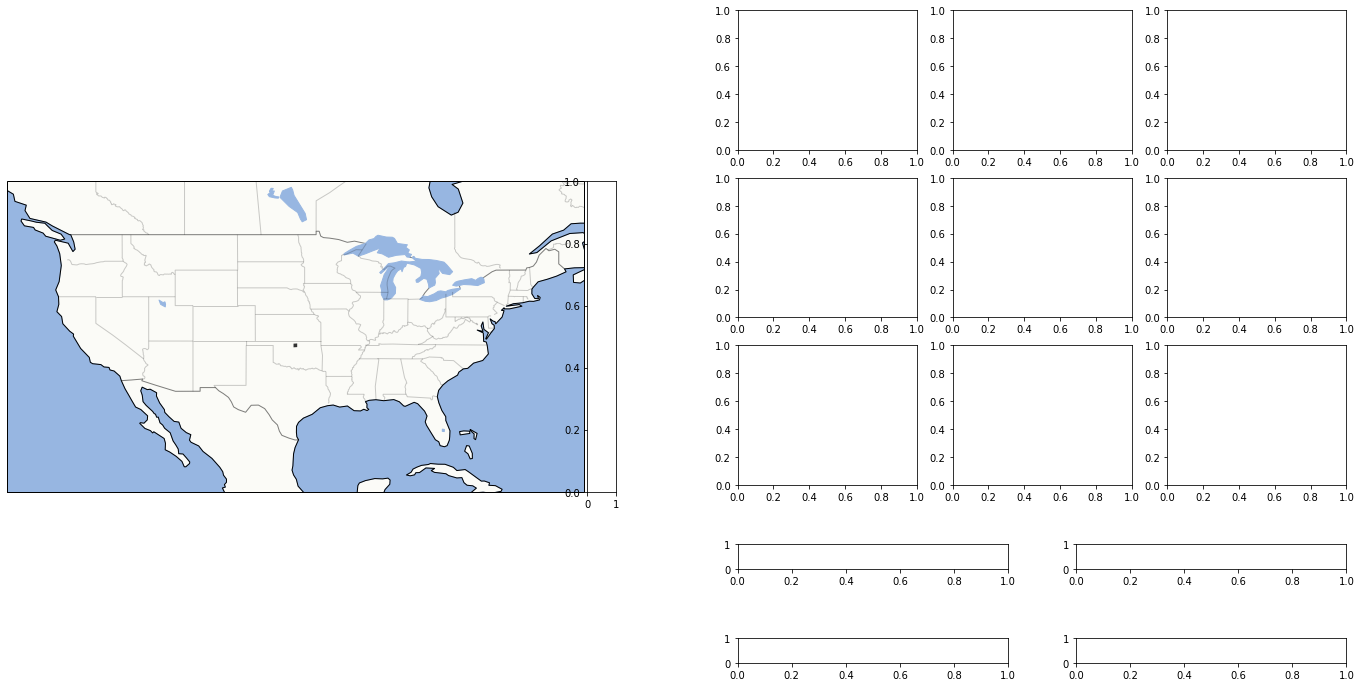

In [33]:
def fig_layout3(extent=conus):
    """Add colorbars for CRMs as well ..."""
    fig = plt.figure(figsize=(24, 12))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.25], figure=fig)
    ax = fig.add_subplot(gs[:, 0], projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.2)
    ax.set_extent(extent, crs=ccrs.PlateCarree()) # CONUS
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05, axes_class=plt.Axes)
    
    ax.add_patch(Polygon(polygon_xy, facecolor='black', alpha=0.8, transform=ccrs.PlateCarree()))
    
    # crm axes:
    gs_crm = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0, 1])
    crm_axes = []
    for ax1 in gs_crm:
        crm_axes.append(fig.add_subplot(ax1))
        # crm_axes.append(ax1)
        
    # add colorbars:
    crm_cbars = []
    gs_cbars = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs[1, 1], hspace=0.25, wspace=0.25)
    for ax2 in [gs_cbars[i] for i in [0, 1, -1, -2]]:
        crm_cbars.append(fig.add_subplot(ax2))
        #crm_cbars.append(ax2)

    return fig, gs, cax, crm_axes, crm_cbars

fig_layout3()

(<Figure size 864x1080 with 15 Axes>,
 GridSpec(3, 1, height_ratios=[1, 1, 0.25]),
  <matplotlib.axes._subplots.AxesSubplot at 0x2aab02798a90>])

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


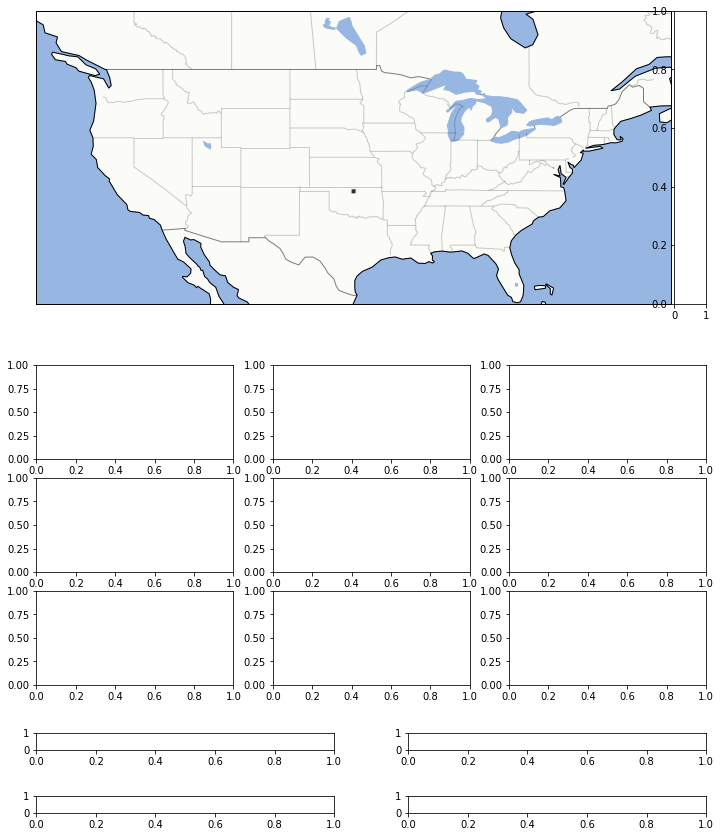

In [118]:
def fig_layout2(extent=conus):
    """Add colorbars for CRMs as well ..."""
    fig = plt.figure(figsize=(12, 15))
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 0.25], figure=fig)
    ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.2)
    ax.set_extent(extent, crs=ccrs.PlateCarree()) # CONUS
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05, axes_class=plt.Axes)
    
    ax.add_patch(Polygon(polygon_xy, facecolor='black', alpha=0.8, transform=ccrs.PlateCarree()))
    
    # crm axes:
    gs_crm = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1])
    crm_axes = []
    for ax1 in gs_crm:
        crm_axes.append(fig.add_subplot(ax1))
        # crm_axes.append(ax1)
        
    # add colorbars:
    crm_cbars = []
    gs_cbars = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs[2], hspace=0.25, wspace=0.25)
    for ax2 in [gs_cbars[i] for i in [0, 1, -1, -2]]:
        crm_cbars.append(fig.add_subplot(ax2))
        #crm_cbars.append(ax2)

    return fig, gs, cax, crm_axes, crm_cbars

fig_layout2()

In [117]:
conus

[230, 295, 25, 55]

In [ ]:
i0 = 28

fig, gs, cax, crm_axes, crm_cbars = fig_layout2(extent=[240, 290, 25, 50])
(ds['PRECT'] * 86400 * 1000).isel(time=i0).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                cmap=cmap_prect, cbar_ax=cax, robust=True)
for n, (ncol, crm_ax) in enumerate(zip(crm_to_subplot(lons, lats), crm_axes)):
    if n > 5:
        xlabel = 'x (km)'
        xtick_labels = True
    else:
        xlabel = ''
        xtick_labels = False
    if n in [0, 3, 6]:
        ylabel = 'z (km)'
        ytick_labels = True
    else:
        ylabel = ''
        ytick_labels = False
    plot_crm_dat(crm_ax, crm_ds2.isel(time=i0, ncol=ncol), edge_color=None,
                 ylim=(0, 20), xlabel=xlabel, ylabel=ylabel,
                 xtick_labels=xtick_labels, ytick_labels=ytick_labels,
                 cbar_axes=crm_cbars)

(<Figure size 864x864 with 11 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2aaafa0d47f0>])

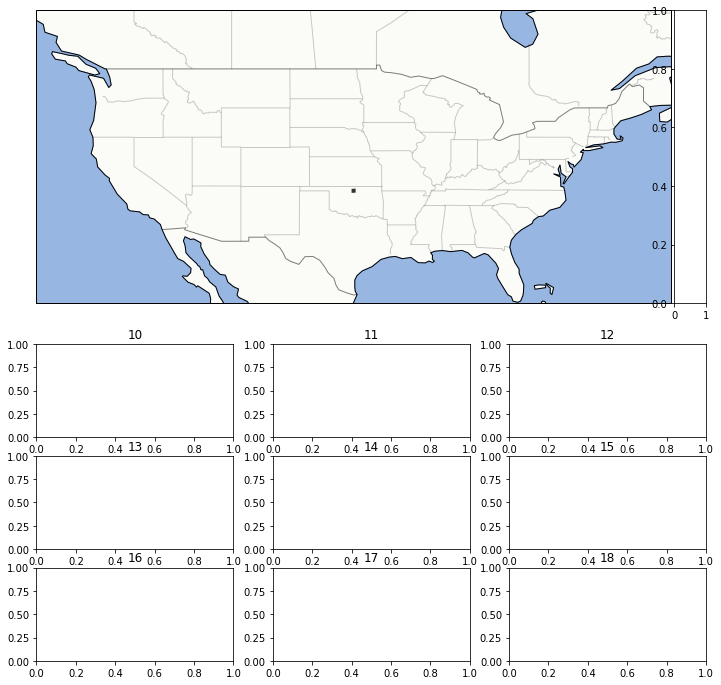

In [57]:
def fig_layout(extent=conus):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(211, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    # ax.add_feature(cfeature.LAKES)
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.2)
    ax.set_extent(extent, crs=ccrs.PlateCarree()) # CONUS
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05, axes_class=plt.Axes)
    
    ax.add_patch(Polygon(polygon_xy, facecolor='black', alpha=0.8, transform=ccrs.PlateCarree()))
    # ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
    nrows = 6
    ncols = 3
    crm_axes = []
    for n in range(nrows*ncols//2 + 1, nrows*ncols + 1):
        # print(n)
        ax2 = fig.add_subplot(nrows, ncols, n)
        ax2.set_title(str(n))
        crm_axes.append(ax2)
    return fig, ax, cax, crm_axes

# fig_layout(extent=[255, 265, 30, 40])
fig_layout()

In [46]:
crm_ds2

<xarray.Dataset>
Dimensions:       (crm_nx_rad: 4, crm_nz: 58, ilev: 73, lev: 72, nbnd: 2, ncol: 9, time: 120, x: 64)
Coordinates:
  * lev           (lev) float64 0.1238 0.1828 0.2699 ... 986.2 993.8 998.5
  * ilev          (ilev) float64 0.1 0.1477 0.218 0.3219 ... 990.5 997.0 1e+03
  * time          (time) object 0002-05-15 00:00:00 ... 0002-05-19 23:00:00
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: crm_nx_rad, crm_nz, nbnd, ncol
Data variables:
    lat           (ncol) float64 36.29 36.31 36.5 36.51 ... 36.71 36.72 36.73
    lon           (ncol) float64 262.3 262.5 262.3 262.5 ... 262.3 262.5 262.7
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    time_bnds     (time, nbnd) object ...
    date_written  (time) |S8 ...
   

AttributeError: 'GridSpec' object has no attribute 'pcolormesh'

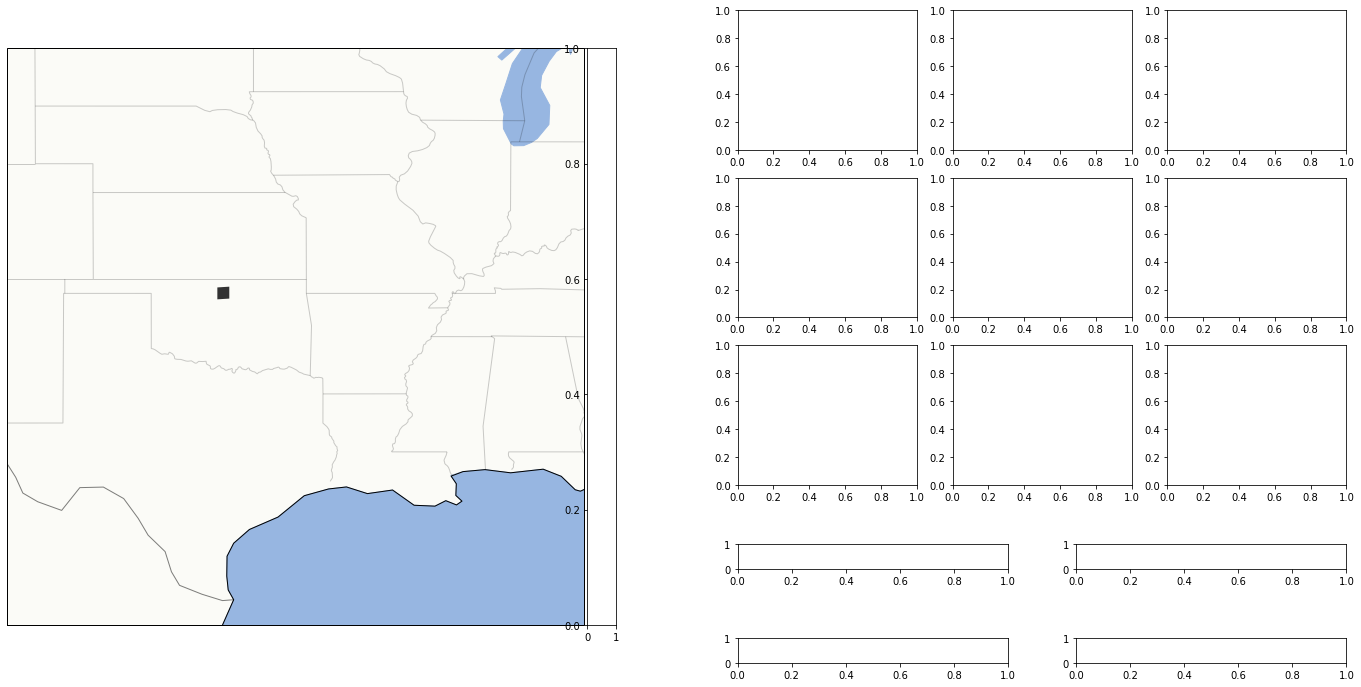

In [35]:
zoomed_extent = [255, 275, 25, 45]
# fig, gs, cax, crm_axes, crm_cbars
for i0 in range(24, 30):
    fig, ax, cax, crm_axes, crm_cbars = fig_layout3(extent=zoomed_extent)
    (ds['PRECT'] * 86400 * 1000).isel(time=i0).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                    cmap=cmap_prect, cbar_ax=cax, robust=True)
    for n, (ncol,crm_ax) in enumerate(zip(crm_to_subplot(lons, lats), crm_axes)):
        if n > 5:
            xlabel = 'x (km)'
            xtick_labels = True
        else:
            xlabel = ''
            xtick_labels = False
        if n in [0, 3, 6]:
            ylabel = 'z (km)'
            ytick_labels = True
        else:
            ylabel = ''
            ytick_labels = False
        plot_crm_dat(crm_ax, crm_ds2.isel(time=i0, ncol=ncol), edge_color=None,
                     ylim=(0, 20), xlabel=xlabel, ylabel=ylabel,
                     xtick_labels=xtick_labels, ytick_labels=ytick_labels)

In [19]:
fig.add_subplot(nrows=6, ncols=3, index=10)

In [ ]:
# version 0: 
# Draw full US map on top; add boxed-region
# Draw zoomed-in US map on bottom;
#   use insets to put CRMs there
# Easier version to start: Full US map on top; boxed-region; 3x3 arrangement in bottom

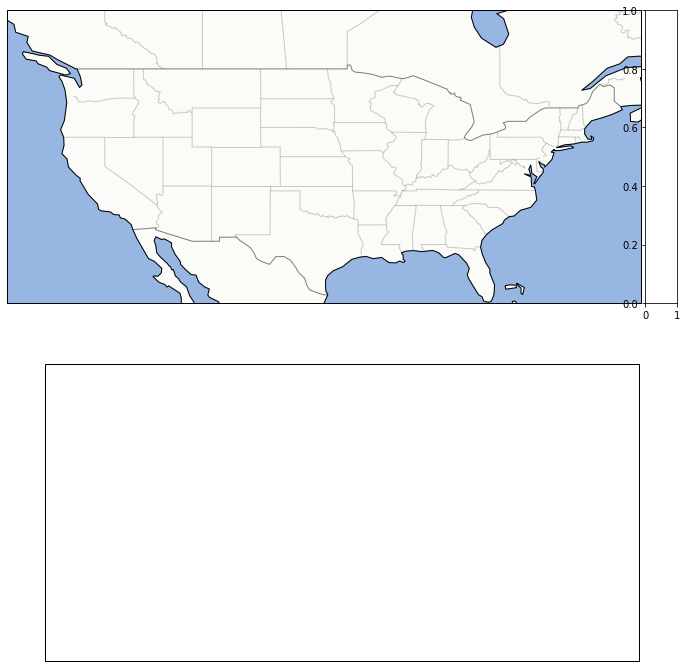

In [49]:
fig_layout()

In [42]:
def fig_layout_inset_marked(i0, crm_ds, inset_pos=[0.75, 0.2, 0.2, 0.2], extent=conus):
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    # ax.add_feature(cfeature.LAKES)
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.2)
    ax.set_extent(extent, crs=ccrs.PlateCarree()) # CONUS
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05, axes_class=plt.Axes)
    
    # add crm inset:
    # ax_crm = plt.axes(inset_pos)
    
    # add connection with cool hack:
    lat = crm_ds.lat.values[i0]
    lon = crm_ds.lon.values[i0]
    
    width = inset_pos[2]
    height = inset_pos[3]
    
    ax_crm = None
    ax2 = inset_axes(ax, width, height)
    """
    ax2.plot([lon-0.125, lon+0.125], [lat-0.125, lat + 0.125])
    # hide the ticks of the linked axes
    ax2.set_xticks([])
    ax2.set_yticks([])

    #add a new axes to the plot and plot whatever you like
    # add crm inset:
    ax_crm = fig.add_axes(inset_pos)
    plot_crm_dat(ax_crm, crm_ds2.isel(time=0, ncol=i0))
    ip = InsetPosition(ax, inset_pos)
    ax2.set_axes_locator(ip)
    # set the new axes (ax3) to the position of the linked axes
    ax_crm.set_axes_locator(ip)
    # I want to be able to control where the mark is connected to, independently of the data in the ax2.plot call
    mark_inset(ax, ax2, 1, 3, ec='0.8')
    return fig, ax, cax, ax_crm
    """

In [43]:
fig_layout_inset_marked(0, crm_ds2)

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 3600x1800 with 3 Axes>

# obsolete?

In [2]:
from e3sm_utils import map_utils

In [3]:
from e3sm_utils import cmclimate

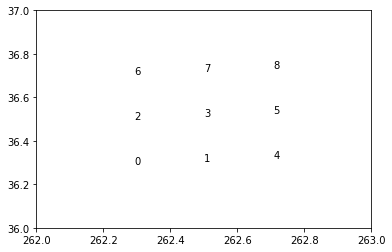

In [66]:
ax = plt.subplot(111)
ax.set_xlim(262, 263)
ax.set_ylim(36, 37)
for n, ncol in enumerate(crm_ds2.ncol):
    ax.text(crm_ds2.lon[n], crm_ds2.lat[n], str(ncol.values.item()))

In [9]:
from e3sm_utils import e3sm_utils_fv as efv

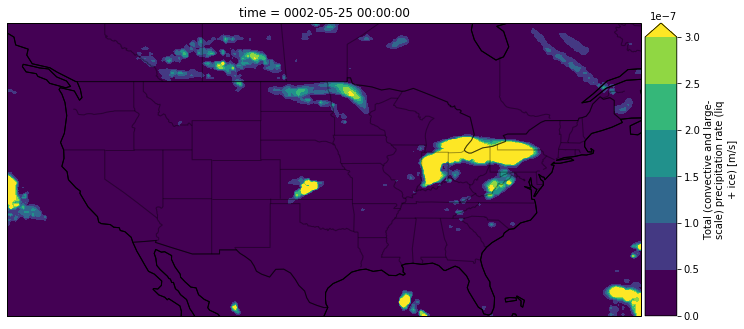

In [14]:
fig, ax, cax = map_utils.map_axes_with_vertical_cb(figsize=(12, 8))
map_utils.map_layout(ax, extent=conus)
efv.plot_da_on_ax(ax, ds['PRECT'].isel(time=0), transform=ccrs.PlateCarree(), extent=conus, cbar_ax=cax, robust=True)

# Official version ...

In [43]:
"""Generate frames for animation of TMQ"""
import matplotlib
matplotlib.use('Agg')
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from concurrent.futures import ProcessPoolExecutor
from e3sm_utils import cmclimate
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  # to make reasonable colorbars
import matplotlib.gridspec as gridspec
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
import glob
import os

conus = [235, 295, 25, 50]  # [lon1, lon2, lat1, lat2]
# Create a feature for states
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

# prepare the crm dataset
def rename_crm_vars(ds, squeeze=True, swap_xdim=True, crm_dx=1):
    """Strip suffix off coordinate and variable names
    Optionally apply squeeze() and swam crm_nx for 'x' dimension """
    # get the suffix
    suf = [d for d in ds.dims if 'ncol' in d][0][4:]
    
    if suf:
        # strip suffix off any dimension/variable that contains the suffix
        ds = ds.rename({v: v.replace(suf, '') for v in ds.dims if suf in v})
        ds = ds.rename({v: v.replace(suf, '') for v in ds if suf in v})
    if squeeze:
        ds = ds.squeeze()
    if swap_xdim:
        # add x dimension in place of crm_nx
        ds.coords['x'] = ('crm_nx', ds.crm_nx.values * crm_dx)
        ds['x'].attrs = {'units': 'km', 'long_name': 'width'}
        ds = ds.swap_dims({'crm_nx': 'x'})
    return ds

# need to order crms appropriately
def crm_to_subplot_order(crm_ds):
    lonsort = np.argsort(crm_ds.lon.values)
    latsort = np.argsort(crm_ds.lat.values)
    trial_rowmat = np.reshape(latsort, (3, 3))
    trial_colmat = np.reshape(lonsort, (3, 3))
    if np.all(trial_rowmat == trial_colmat.transpose()):
        # currently sorted bottom to top, so need to swap that
        return np.ravel(trial_rowmat[::-1, :])
    else:
        raise ValueError("need to do a better sort in longitude")
        
def crm_bounding_patch(crm_ds):
    """points in convex hull of crm array in crm_ds"""
    lons = crm_ds.lon.values
    lats = crm_ds.lat.values

    pts = np.stack([lons, lats], axis=1)
    hull = ConvexHull(pts)
    polygon_xy = np.stack([pts[hull.vertices,0], pts[hull.vertices, 1]], axis=1)
    return polygon_xy

# prepare figure canvas:
def fig_layout(extent=conus, polygon_xy=None, figsize=(24, 8)):
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.15], figure=fig)
    # top: map with vertical colorbar on right
    ax = fig.add_subplot(gs[:, 0], projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    # ax.add_feature(cfeature.LAKES)
    ax.add_feature(states_provinces, edgecolor='black', alpha=0.2)
    ax.set_extent(extent, crs=ccrs.PlateCarree()) # CONUS
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05, axes_class=plt.Axes)
    
    if polygon_xy is not None:
        # show region corresponding to CRM array
        ax.add_patch(Polygon(polygon_xy, facecolor='black', alpha=0.8, transform=ccrs.PlateCarree()))
    
    # middle: list of crm axes
    gs_crm = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0, 1])
    crm_axes = []
    for ax1 in gs_crm:
        crm_axes.append(fig.add_subplot(ax1))
        
    # bottom: crm colorbars
    crm_cbars = []
    gs_cbars = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs[1, 1], hspace=0.25, wspace=0.25)
    for ax2 in [gs_cbars[i] for i in [0, 1, -1, -2]]:
        crm_cbars.append(fig.add_subplot(ax2))

    return fig, ax, cax, crm_axes, crm_cbars

def mask_dat(var, thresh, value=None):
    tmp = var.values.copy()
    tmp[tmp < thresh] = np.nan
    if value is not None:
        tmp[tmp >= thresh] = value
    return tmp

# function to plot crm level output:
def plot_crm_dat(ax1, crm_ds, edge_color=None, ylim=(0, 20),
                 ylabel='z (km)', xlabel='x (km)',
                 xtick_labels=True, ytick_labels=True,
                 cbar_axes=None,
                 cbar_kwargs={'orientation': 'horizontal', 'aspect': 50}
                ):
    # assume that crm_ds is already selected for a given time and ncol location
    if any(var in crm_ds.dims for var in ['ncol', 'time']):
        raise ValueError('crm_ds should not contain ncol or time dimensions')
    ax1.clear()
    tol = 1.0e-10
    lon = crm_ds.lon.values.item()
    lat = crm_ds.lat.values.item()

    # convert crm_nz to 'Z3' coordinate
    crm_ds0 = crm_ds.squeeze().copy()
    z3 = crm_ds['Z3'] / 1000.0 # in km
    zvals = z3.values[::-1] # reversed
    nz = len(crm_ds0['crm_nz'])
    crm_ds0.coords['z'] = ('crm_nz', zvals[:nz])
    crm_ds0['z'].attrs = z3.attrs
    crm_ds0 = crm_ds0.swap_dims({'crm_nz': 'z'})

    qc = crm_ds0['CRM_QC'] * 1000
    qi = crm_ds0['CRM_QI'] * 1000
    qpc = crm_ds0['CRM_QPC'] * 1000
    qpi = crm_ds0['CRM_QPI'] * 1000
    qc.attrs['units'] = 'g/kg'
    qi.attrs['units'] = 'g/kg'
    qpc.attrs['units'] = 'g/kg'
    qpi.attrs['units'] = 'g/kg'

    qc.values = mask_dat(qc, tol)
    qi.values = mask_dat(qi, tol)
    qpc.values = mask_dat(qpc, tol)
    qpi.values = mask_dat(qpi, tol)
    
    qc_cm = plt.cm.Greys
    qi_cm = plt.cm.Purples
    qpc_cm = plt.cm.Blues
    qpi_cm = plt.cm.Greens
    
    qc_max = 0.1
    qi_max = 0.1
    qpi_max = 0.4
    qpc_max = 0.4
    alphax = 0.6
    
    # add the (static) colorbars
    cb_kwargs = {'orientation': 'horizontal', 'extend': 'max'}
    norm_p = matplotlib.colors.Normalize(vmin=0, vmax=qpi_max)
    norm_c = matplotlib.colors.Normalize(vmin=0, vmax=qc_max)
    cb_qc = matplotlib.colorbar.ColorbarBase(cbar_axes[0], cmap=qc_cm,
                                             norm=norm_c, **cb_kwargs)
    cb_qc.set_label('CRM_QC (g/kg)')
    cb_qi = matplotlib.colorbar.ColorbarBase(cbar_axes[1], cmap=qi_cm,
                                             norm=norm_c, **cb_kwargs)
    cb_qi.set_label('CRM_QI (g/kg)')
    cb_qpc = matplotlib.colorbar.ColorbarBase(cbar_axes[2], cmap=qpc_cm,
                                             norm=norm_p, **cb_kwargs)
    cb_qpc.set_label('CRM_QPC (g/kg)')
    cb_qpi = matplotlib.colorbar.ColorbarBase(cbar_axes[3], cmap=qpi_cm,
                                             norm=norm_p, **cb_kwargs)
    cb_qpi.set_label('CRM_QPI (g/kg)')

    # if cbar_axes is None:
    if not np.all(np.isnan(qc.values)):
        qc.plot(ax=ax1, vmin=0, vmax=qc_max, cmap=qc_cm, alpha=alphax, add_colorbar=False)
    if not np.all(np.isnan(qi.values)):
        qi.plot(ax=ax1, vmin=0, vmax=qi_max, cmap=qi_cm, alpha=alphax, add_colorbar=False)
    if not np.all(np.isnan(qpc.values)):
        qpc.plot(ax=ax1, vmin=0, vmax=qpc_max, cmap=qpc_cm, alpha=alphax, add_colorbar=False)
    if not np.all(np.isnan(qpi.values)):
        qpi.plot(ax=ax1, vmin=0, vmax=qpi_max, cmap=qpi_cm, alpha=alphax, add_colorbar=False)
    #     else:
    #         if not np.all(np.isnan(qc.values)):
    #             qc.plot(ax=ax1, vmin=0, vmax=qc_max, cmap=qc_cm, alpha=alphax,
    #                     cbar_ax=cbar_axes[0], cbar_kwargs=cbar_kwargs)
    #         if not np.all(np.isnan(qi.values)):
    #             qi.plot(ax=ax1, vmin=0, vmax=qi_max, cmap=qi_cm, alpha=alphax,
    #                     cbar_ax=cbar_axes[1], cbar_kwargs=cbar_kwargs)
    #         if not np.all(np.isnan(qpc.values)):
    #             qpc.plot(ax=ax1, vmin=0, vmax=qpc_max, cmap=qpc_cm, alpha=alphax,
    #                      cbar_ax=cbar_axes[2], cbar_kwargs=cbar_kwargs)
    #         if not np.all(np.isnan(qpi.values)):
    #             qpi.plot(ax=ax1, vmin=0, vmax=qpi_max, cmap=qpi_cm, alpha=alphax, 
    #                      cbar_ax=cbar_axes[3], cbar_kwargs=cbar_kwargs)

    ax1.set_ylim(*ylim)
    ax1.set_xlim(0, qpc.x.values[-1])
    if edge_color is not None:
        ax1.spines['bottom'].set_color(edge_color)
        ax1.spines['top'].set_color(edge_color)
        ax1.spines['left'].set_color(edge_color)
        ax1.spines['right'].set_color(edge_color)
        ax1.set_title('2D CRM', color=edge_color)
        ax1.set_ylabel(ylabel, color=edge_color)
        ax1.set_xlabel(xlabel, color=edge_color)
        ax1.tick_params(axis='x', colors=edge_color)
        ax1.tick_params(axis='y', colors=edge_color)
    else:
        ax1.set_title('CRM at ({:.2f}, {:.2f})'.format(lon, lat))
        ax1.set_ylabel(ylabel)
        ax1.set_xlabel(xlabel)
    ax1.tick_params(labelbottom=xtick_labels, labelleft=ytick_labels)


def plot_da_with_crms(da, crm_ds, extent=conus, figsize=(24, 12), da_kwargs={'cmap': cmclimate.cm.WhiteBlueGreenYellowRed, 'vmin': 0, 'vmax': 40}):    
    fig, ax, cax, crm_axes, crm_cbars = fig_layout(extent=extent, polygon_xy=crm_bounding_patch(crm_ds), figsize=figsize)
    da.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_ax=cax, robust=True, **da_kwargs)
    for n, (ncol, crm_ax) in enumerate(zip(crm_to_subplot_order(crm_ds), crm_axes)):
        if n > 5:
            xlabel = 'x (km)'
            xtick_labels = True
        else:
            xlabel = ''
            xtick_labels = False
        if n in [0, 3, 6]:
            ylabel = 'z (km)'
            ytick_labels = True
        else:
            ylabel = ''
            ytick_labels = False
        plot_crm_dat(crm_ax, crm_ds.isel(ncol=ncol), edge_color=None,
                     ylim=(0, 20), xlabel=xlabel, ylabel=ylabel,
                     xtick_labels=xtick_labels, ytick_labels=ytick_labels,
                     cbar_axes=crm_cbars)

def match_date_subset(dates, year=None, month=None, days=None):
    """ Extract a subset of dates from the original list of dates
    """
    if year is None and month is None and days is None:
        return dates
    
    def sel(val, groups):
        return groups is None or val in groups
    
    return sorted(['-'.join([yr, mo, dy]) for yr, mo, dy in [d.split('-') for d in dates] if 
                   all([sel(yr, year), sel(mo, month), sel(dy, days)])])    

# dictionary of dataArray transformation opts by pvar
da_opts = {'PRECT': {'rescale': 86400000, 'units': 'mm/day'}}

def extract_da(plotvar, ds):
    """Extract da = ds[plotvar] and apply optional transformations"""
    da = ds[plotvar]
    opts = da_opts[plotvar] if plotvar in da_opts else dict()
    if 'rescale' in opts:
        da = da * opts['rescale']
    if 'units' in opts:
        da.attrs['units'] = opts['units']
    return da

def prepare_plot_data(date):
    topdir_sp = '/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/'
    sp_case = 'earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h1'    
    file_sp = topdir_sp + '.'.join([sp_case, date, 'nc'])
    ds_sp = xr.open_dataset(file_sp)
    
    topdir_crm = '/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_crm_hist/daily/'
    crm_case = 'earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h3'
    file_crm = topdir_crm + '.'.join([crm_case, date, 'nc'])
    crm_ds = rename_crm_vars(xr.open_dataset(file_crm))
    return extract_da('PRECT', ds_sp), crm_ds

def print_frames_from_date(date, out_prefix='conus_crm', topdir='/global/cscratch1/sd/crjones/figs/crm/'):
    """Plot hourly snapshots of plotvar for given date and save to file"""
    print('loading date ' + date)
    prect, crm_ds = prepare_plot_data(date)
    for i in range(len(crm_ds.time)):
        out_name = '_'.join([out_prefix, date, str(i).zfill(2)])
        plot_da_with_crms(prect.isel(time=i), crm_ds.isel(time=i), extent=conus)
        plt.savefig(topdir + out_name + '.png', dpi=600, bbox_inches='tight')
        plt.close()

def main(do_parallel=True):
    # dates_to_process given as 'yyyy-mm-dd'
    files_e3sm = glob.glob('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/*.nc')
    crm_files = glob.glob('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_crm_hist/*.nc')
    
    crm_ds = xr.open_mfdataset(crm_files)

    # set of dates in 'yyyy-mm-dd' format
    dates_in_crm_ds = set([t.strftime('%Y-%m-%d').replace(' ', '0') for t in crm_ds.time.values])
    dates_in_e3sm = sorted([f.split(sep='.')[-2] for f in files_e3sm])
    common_dates = [f for f in dates_in_e3sm if f in dates_in_crm_ds]

    # select May 0002
    dates_to_process = match_date_subset(common_dates, year='0002', month='05', days=None)
    print(dates_to_process)
    
    # crm_ds = rename_crm_vars(crm_ds)
    # serial version:
    if not do_parallel:
        for date in dates_to_process:
            print_frames_from_date(date)
    else:
        with ProcessPoolExecutor(max_workers=8) as Executor:
            Executor.map(print_frames_from_date, dates_to_process)

/global/homes/c/crjones/.conda/envs/spe3sm_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
date = '0002-05-15'
prect, crm_ds = prepare_plot_data(date)

In [38]:
prect

<xarray.DataArray 'PRECT' (time: 24, lat: 720, lon: 1440)>
array([[[0.007722, 0.007722, ..., 0.007722, 0.007722],
        [0.00458 , 0.00458 , ..., 0.00458 , 0.00458 ],
        ...,
        [0.020816, 0.020816, ..., 0.020816, 0.020816],
        [0.021578, 0.021578, ..., 0.021578, 0.021578]],

       [[0.007336, 0.007336, ..., 0.007336, 0.007336],
        [0.00431 , 0.00431 , ..., 0.00431 , 0.00431 ],
        ...,
        [0.019544, 0.019544, ..., 0.019544, 0.019544],
        [0.020002, 0.020002, ..., 0.020002, 0.020002]],

       ...,

       [[0.174415, 0.174415, ..., 0.174415, 0.174415],
        [0.180171, 0.18017 , ..., 0.18017 , 0.180171],
        ...,
        [0.012596, 0.012596, ..., 0.012596, 0.012596],
        [0.013499, 0.013499, ..., 0.013499, 0.013499]],

       [[0.188425, 0.188425, ..., 0.188425, 0.188425],
        [0.184712, 0.184712, ..., 0.184712, 0.184712],
        ...,
        [0.011955, 0.011955, ..., 0.011955, 0.011955],
        [0.012121, 0.012121, ..., 0.012121, 0

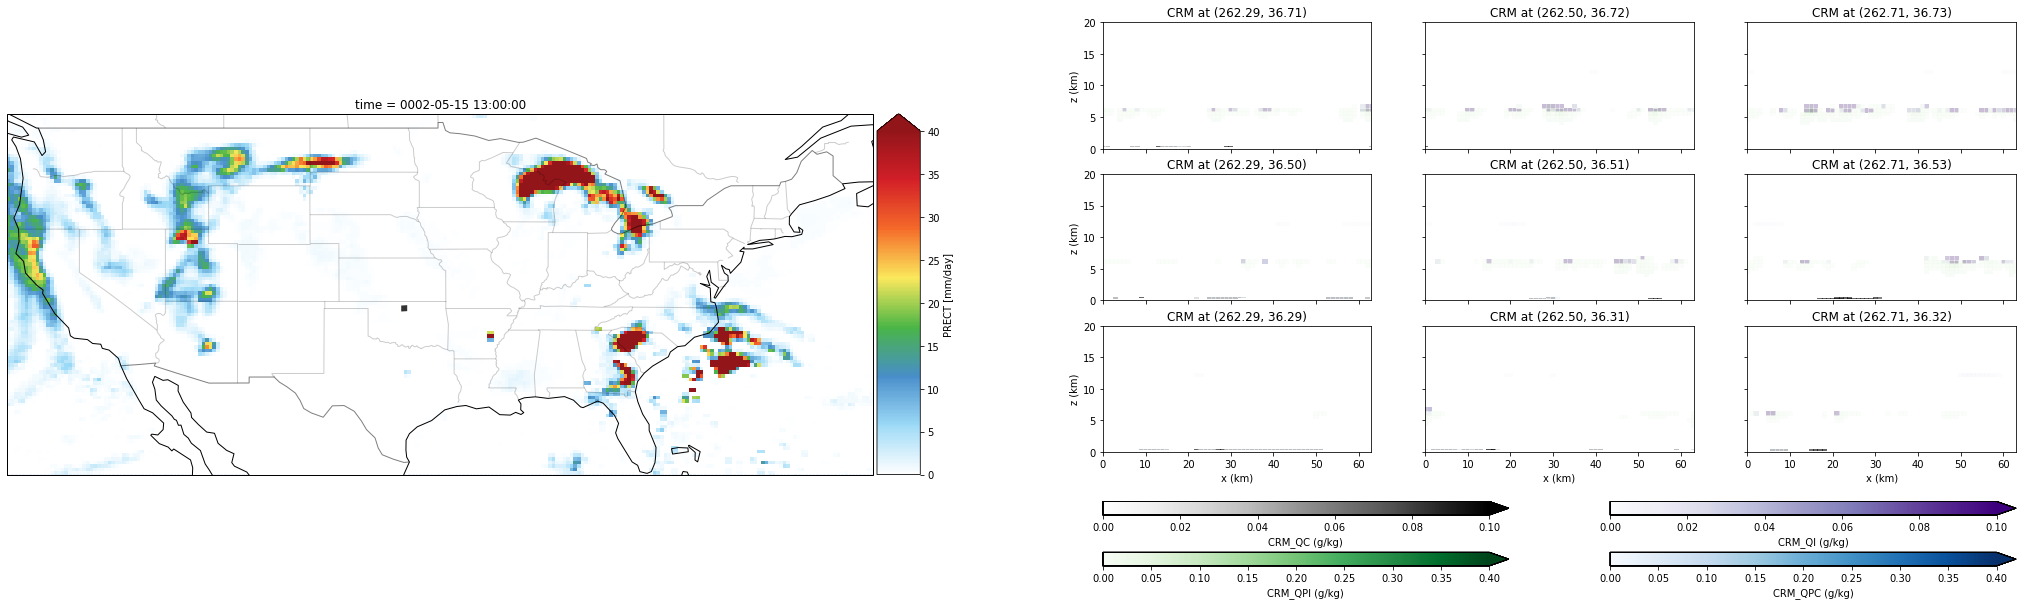

In [53]:
i = 13
plot_da_with_crms(prect.isel(time=i), crm_ds.isel(time=i), extent=conus, figsize=(36, 10))